## Wil Noble Chapter 5

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('../ch_05/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('../ch_05/data/earthquakes.csv')
covid = pd.read_csv('../ch_05/data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Exercise 1

<AxesSubplot:xlabel='date'>

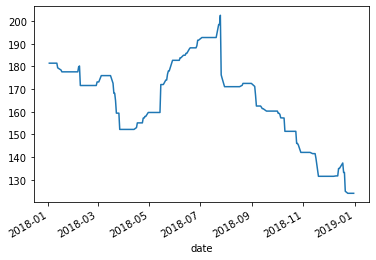

In [6]:
fb.close.rolling('20D').min().plot()

## Exercise 2

<AxesSubplot:ylabel='Density'>

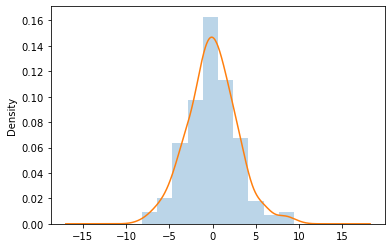

In [11]:
ax = (fb.open - fb.close).plot(kind='hist', density=True, alpha=0.3)

(fb.open - fb.close).plot(kind='kde', ax=ax)

## Exercise 3

<AxesSubplot:>

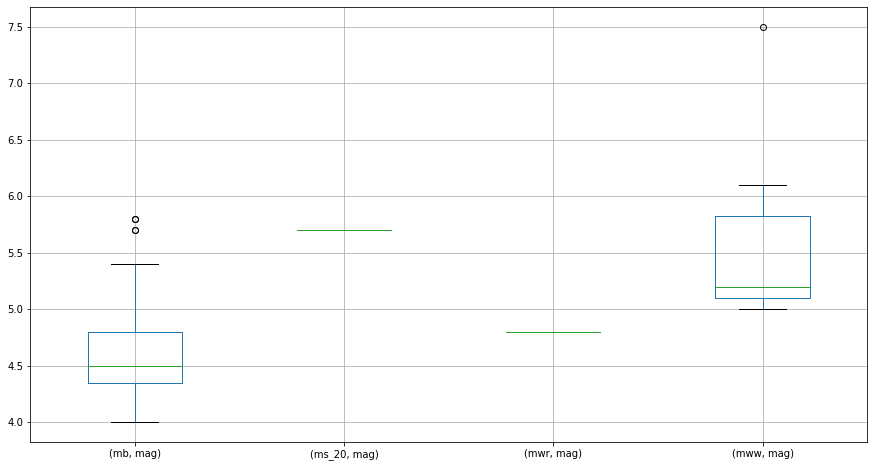

In [14]:
quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']].groupby('magType').boxplot(figsize=(15, 8), subplots=False)

## Exercise 4

<AxesSubplot:xlabel='date'>

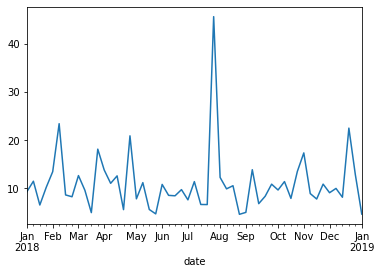

In [20]:
fb.resample('1W').agg(dict(high='max', low='min')).assign(
    max_change_weekly=lambda x: x.high - x.low).max_change_weekly.plot()

## Exercise 5

<AxesSubplot:xlabel='date'>

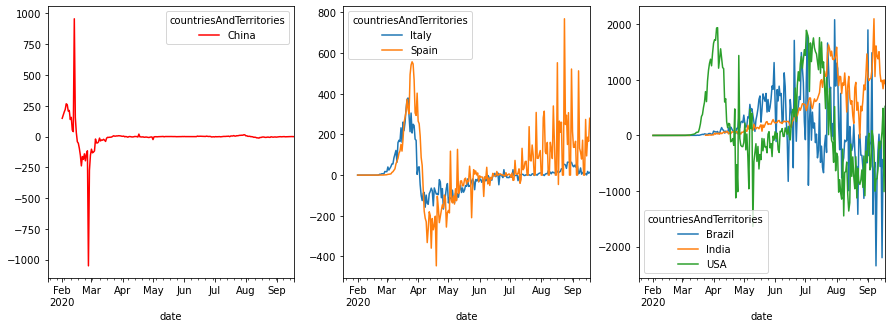

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average = covid.pivot_table(
    index=covid.index, columns=['countriesAndTerritories'], values='cases').apply(lambda x: x.diff().rolling(14).mean())

new_cases_rolling_average[['China']].plot(ax=axes[0], color='red')

new_cases_rolling_average[['Italy', 'Spain']].plot(ax=axes[1])
    
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2])

## Exercise 6

<AxesSubplot:title={'center':'After hours trading monthly effect'}, xlabel='date'>

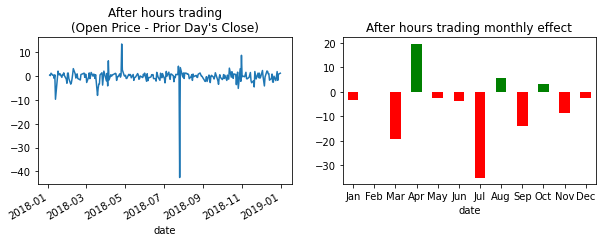

In [26]:
series = (fb.open - fb.close.shift())
monthly_effect = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(
    ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)'
)

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='After hours trading monthly effect',
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)

#Could not figure this one out for some reason 